# Clustering - image
Goal: Seperating the star from the background of the image

## Imports

In [1]:
import pandas as pd
import numpy as np
from PIL import Image
import itertools
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.metrics import silhouette_score, davies_bouldin_score

## Constants

In [2]:
INPUT_PATH = "star.jpg"
COLORS = ['R', 'G', 'B']
INDICES = ['location_x', 'location_y']
USE_COLORS_ONLY = False # Which features to create: colors only or colors and distances
COLUMNS = COLORS if USE_COLORS_ONLY else COLORS+INDICES # Assumed distanes = locations ._.
NUMBER_OR_CLUSTERS = 2 # star and background
COLORS_IMPORTANCE = 1 # distance feautres' is 1...
IMAGE_RES_SIZE = 3 # the larger this value- the smaller the output will be for Agglomerative clustering

## Read and Parse Data

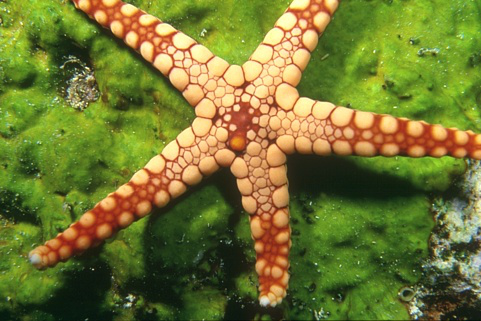

In [3]:
star_image = Image.open(INPUT_PATH)
star_array = np.array(star_image)
original_shape = star_array.shape
star_image

## Clustering

### K-Means

In [4]:
# build df based on input hyperparams
if USE_COLORS_ONLY:
    data_for_df = star_array.reshape(-1,3)
else:
    indices = np.moveaxis(np.indices(star_image.size), 0, 2).reshape(-1,2)
    colors = star_array.reshape(-1,3)
    data_for_df = np.concatenate((colors, indices), axis=1)
df = pd.DataFrame(data_for_df, columns=COLUMNS)
normed_df = (df-df.min())/(df.max()-df.min())

# Give more importance to colors because it feels rigt
normed_df[COLORS] = normed_df[COLORS] * COLORS_IMPORTANCE



kmeans = KMeans(n_clusters=NUMBER_OR_CLUSTERS)
res = kmeans.fit_predict(normed_df)

### Agglomerative Clustering

In [57]:
# update image shape
original_shape = star_array[::IMAGE_RES_SIZE, ::IMAGE_RES_SIZE].shape

if USE_COLORS_ONLY:
    data_for_df = star_array[::IMAGE_RES_SIZE, ::IMAGE_RES_SIZE].reshape(-1,3)
else:
    indices = np.moveaxis(np.indices(star_image.size), 0, 2)[::IMAGE_RES_SIZE, ::IMAGE_RES_SIZE].reshape(-1,2)
    colors = star_array[::IMAGE_RES_SIZE, ::IMAGE_RES_SIZE].reshape(-1,3)
    data_for_df = np.concatenate((colors, indices), axis=1)
df = pd.DataFrame(data_for_df, columns=COLUMNS)
normed_df = (df-df.min())/(df.max()-df.min())


# Give more importance to colors because it feels rigt
normed_df[COLORS] = normed_df[COLORS] * COLORS_IMPORTANCE
aggclus = AgglomerativeClustering(n_clusters=NUMBER_OR_CLUSTERS)

res = aggclus.fit_predict(normed_df)

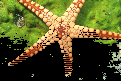

In [54]:
# Change one cluster to be Black
df.loc[res==1] = 0

output_data = df[COLORS].values

# present results
output_image = output_data.reshape(original_shape)
Image.fromarray(output_image.astype('uint8'), 'RGB')

## Evaluation

In [5]:
print(f'silhouette_score = {silhouette_score(df, res)}')

silhouette_score = 0.3384949405750888


In [6]:
print(f'davies_bouldin_score = {davies_bouldin_score(df, res)}')

davies_bouldin_score = 1.1621519156632396
